In [7]:
import pandas as pd

# Step 1: Load the Data

In [8]:
df = pd.read_csv('D:/git/sales-forecasting-ml/data/train.csv')



# Step 2: Exploratory Data Analysis (EDA)

In [14]:
df.head()
df.describe()
df.isnull().sum()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [18]:
df['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

### Describution of the key Columns

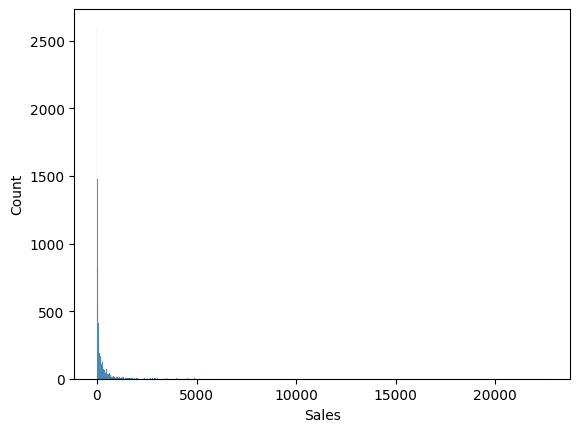

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Sales'])
plt.show()

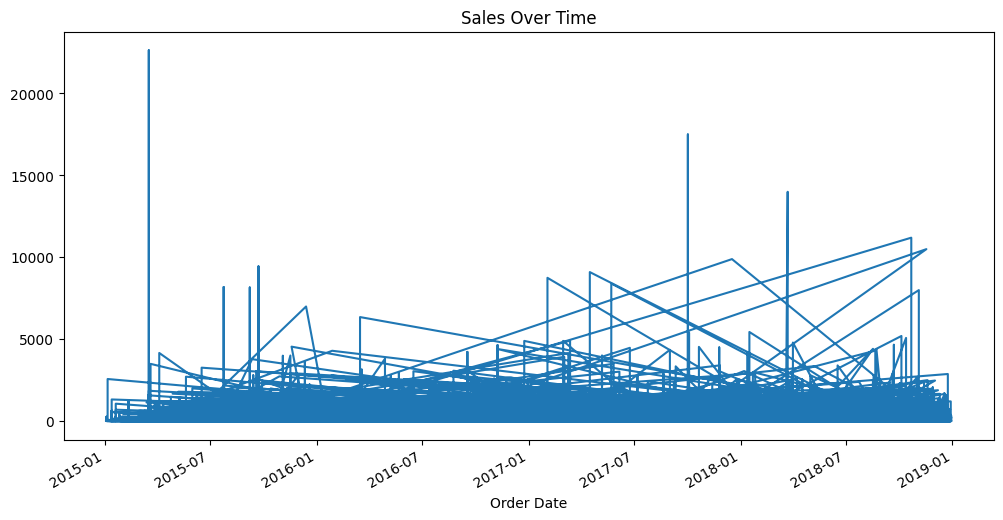

In [31]:
df['Order Date']
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df.set_index('Order Date')['Sales'].plot(figsize=(12, 6)) 
plt.title('Sales Over Time')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18124\368248430.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


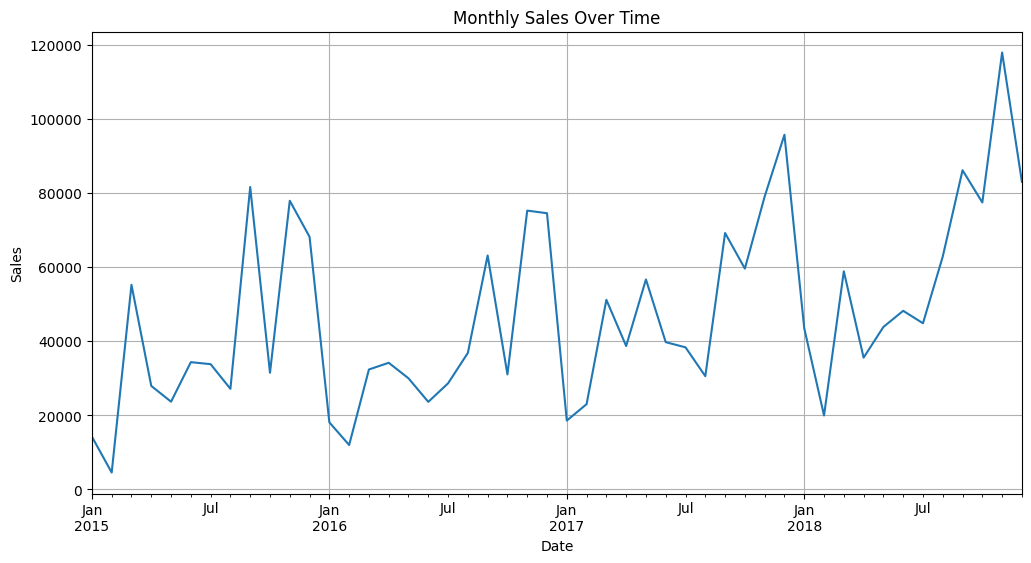

In [32]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [50]:
df['Product ID'].nunique()

Product ID
FUR-BO-10000112     825.174
FUR-BO-10000330    1064.624
FUR-BO-10000362    2154.348
FUR-BO-10000468     723.842
FUR-BO-10000711     851.760
                     ...   
TEC-PH-10004912     351.680
TEC-PH-10004922    1085.238
TEC-PH-10004924      56.164
TEC-PH-10004959     341.666
TEC-PH-10004977    5291.730
Name: Sales, Length: 1861, dtype: float64

In [56]:
df.groupby('Product ID')['Sales'].sum().sort_values(ascending=False).head(5)

Product ID
TEC-CO-10004722    61599.824
OFF-BI-10003527    27453.384
TEC-MA-10002412    22638.480
FUR-CH-10002024    21870.576
OFF-BI-10001359    19823.479
Name: Sales, dtype: float64

## Show the Sale of top 20 product

<Axes: title={'center': 'Top 20 Products by Sales'}, xlabel='Product ID'>

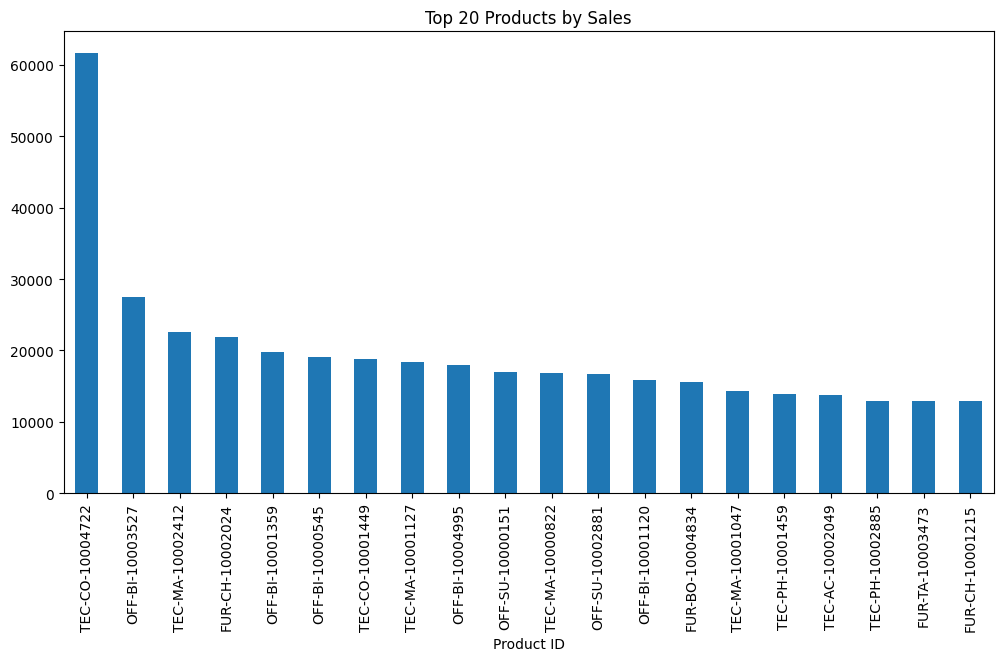

In [47]:
top_products = df.groupby('Product ID')['Sales'].sum().sort_values(ascending=False).head(20)
top_products.plot(kind='bar', figsize=(12,6), title='Top 20 Products by Sales')